In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
comcast_dataset = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [356]:
comcast_dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [357]:
comcast_dataset.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [358]:
comcast_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [359]:
comcast_dataset.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [360]:
comcast_dataset_dmy=comcast_dataset.groupby('Date_month_year')

In [361]:
comcast_dataset_dmy.size()

Date_month_year
04-Apr-15    12
04-Aug-15    28
04-Dec-15    15
04-Feb-15    27
04-Jan-15    18
             ..
29-May-15    14
30-Apr-15    24
30-Jun-15    53
30-May-15     9
31-May-15    10
Length: 91, dtype: int64

In [362]:
comcast_dataset.sort_values(['Date_month_year'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

In [363]:
comcast_dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
1416,218108,Comcast Business Phone/Internet Contract Disag...,04-04-15,04-Apr-15,6:39:55 PM,Internet,Newnan,Georgia,30265,Closed,No
1483,217985,bait and switch services for monetary gain,04-04-15,04-Apr-15,4:07:36 PM,Internet,Orcutt,California,93455,Closed,No
584,217999,Misleading information given,04-04-15,04-Apr-15,4:21:46 PM,Internet,Des Moines,Washington,98148,Closed,Yes
561,218043,comcast services,04-04-15,04-Apr-15,5:32:05 PM,Internet,Denver,Colorado,80227,Closed,No
1892,218168,Multiple Unauthorized and Unwarranted Credit C...,04-04-15,04-Apr-15,8:10:35 PM,Customer Care Call,Shoreview,Minnesota,55126,Closed,No


In [364]:
comcast_dataset['month'] = pd.DatetimeIndex(comcast_dataset['Date_month_year']).month
comcast_dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
1416,218108,Comcast Business Phone/Internet Contract Disag...,04-04-15,04-Apr-15,6:39:55 PM,Internet,Newnan,Georgia,30265,Closed,No,4
1483,217985,bait and switch services for monetary gain,04-04-15,04-Apr-15,4:07:36 PM,Internet,Orcutt,California,93455,Closed,No,4
584,217999,Misleading information given,04-04-15,04-Apr-15,4:21:46 PM,Internet,Des Moines,Washington,98148,Closed,Yes,4
561,218043,comcast services,04-04-15,04-Apr-15,5:32:05 PM,Internet,Denver,Colorado,80227,Closed,No,4
1892,218168,Multiple Unauthorized and Unwarranted Credit C...,04-04-15,04-Apr-15,8:10:35 PM,Customer Care Call,Shoreview,Minnesota,55126,Closed,No,4


In [365]:
comcast_dataset_month = comcast_dataset.groupby('month')
comcast_dataset_month_size = comcast_dataset_month.size()
comcast_dataset_month_size

month
1       55
2       59
3       45
4      375
5      317
6     1046
7       49
8       67
9       55
10      53
11      38
12      65
dtype: int64

In [366]:
comcast_dataset["Date_month_year"] = pd.to_datetime(comcast_dataset["Date_month_year"])

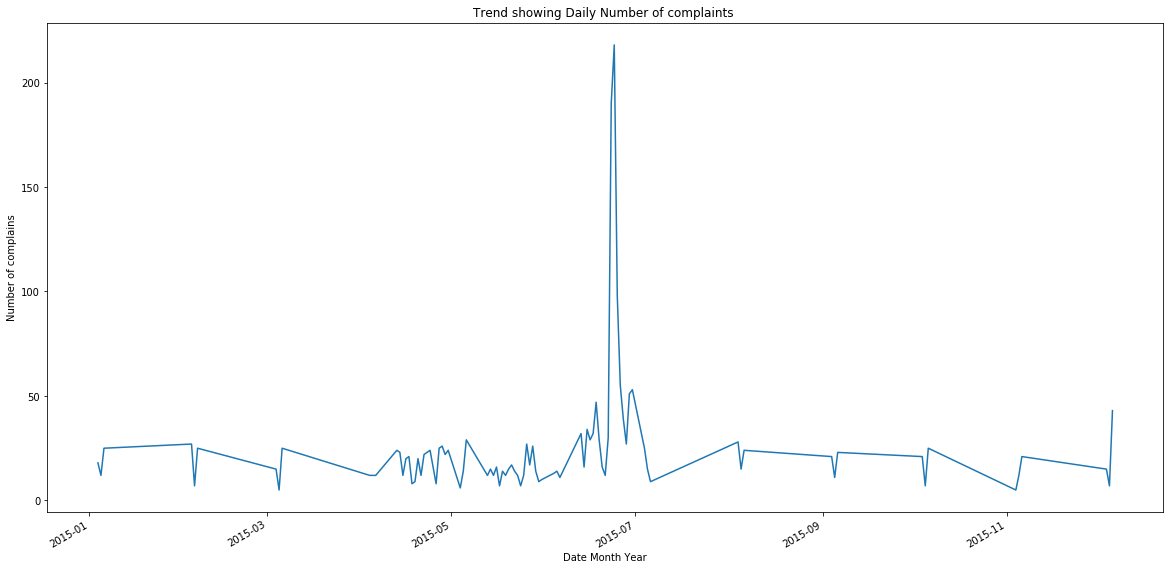

In [367]:
plt.figure(figsize=(20,10))
comcast_dataset['Date_month_year'].value_counts().plot()
plt.title('Trend showing Daily Number of complaints ')
plt.xlabel('Date Month Year')
plt.ylabel('Number of complains')
plt.show()

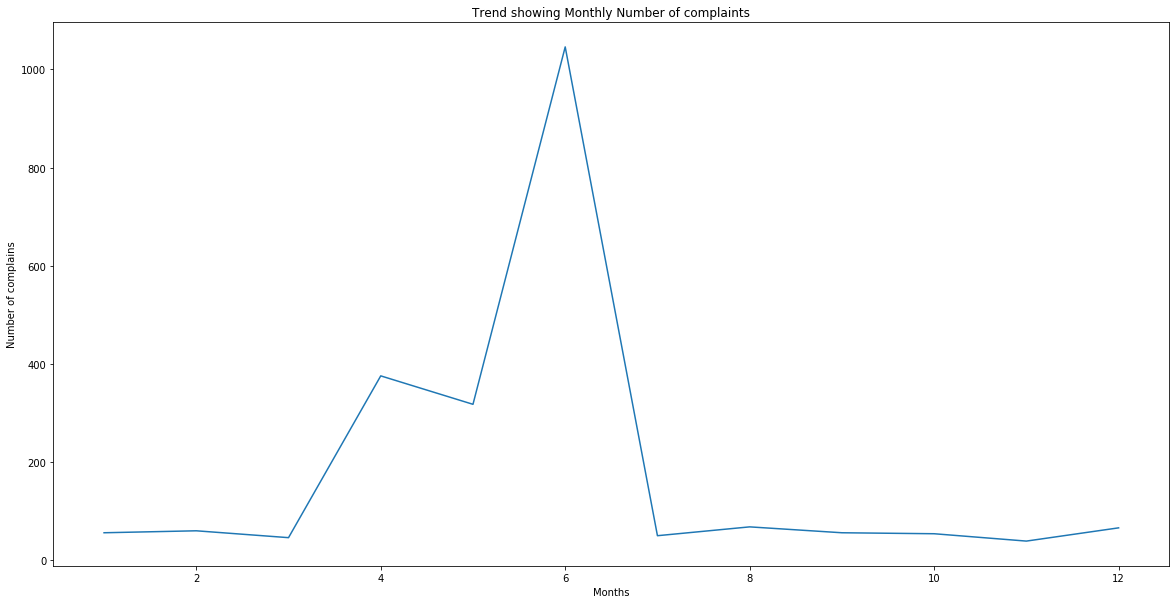

In [368]:
plt.figure(figsize=(20,10))
comcast_dataset_month_size.plot()
plt.title('Trend showing Monthly Number of complaints')
plt.xlabel('Months')
plt.ylabel('Number of complains')
plt.show()

In [369]:
complain_type = comcast_dataset['Customer Complaint'].str.lower().value_counts()
complain_type.head(n=20)

comcast                      102
comcast data cap              30
comcast internet              29
comcast data caps             21
comcast billing               18
internet speed                15
comcast service               15
data caps                     13
unfair billing practices      13
data cap                      12
comcast complaint             11
comcast/xfinity               11
comcast internet service      10
billing                        9
billing issues                 8
complaint against comcast      5
internet                       5
comcast cable                  5
internet service               5
comcast billing complaint      5
Name: Customer Complaint, dtype: int64

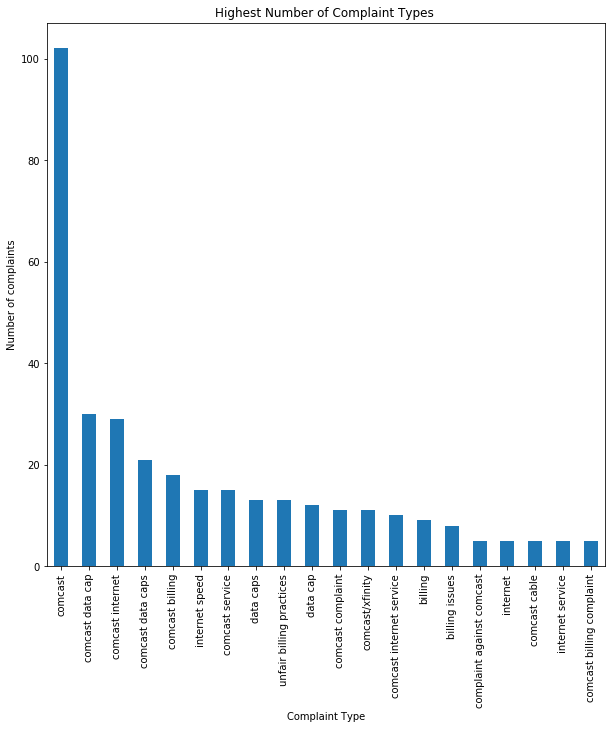

In [370]:
complain_type_head = complain_type.head(n=20)
plt.figure(figsize=(10,10))
complain_type_head.plot.bar()
plt.title('Highest Number of Complaint Types ')
plt.xlabel('Complaint Type')
plt.ylabel('Number of complaints')
plt.show()

### Maximum complaints are from data cap, internet problems and billing issues and services

In [371]:
comcast_dataset.groupby('Status').size()

Status
Closed     734
Open       363
Pending    154
Solved     973
dtype: int64

In [372]:
comcast_dataset['New Status'] = comcast_dataset['Status']

In [373]:
comcast_dataset['New Status'].replace(('Pending', 'Solved'), ('Open', 'Closed'), inplace=True)
comcast_dataset.groupby('New Status').size()

New Status
Closed    1707
Open       517
dtype: int64

In [374]:
comcast_dataset.groupby('State').size()

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [547]:
comcast_dataset['State'].value_counts()

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            12
Delaware                 12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont             

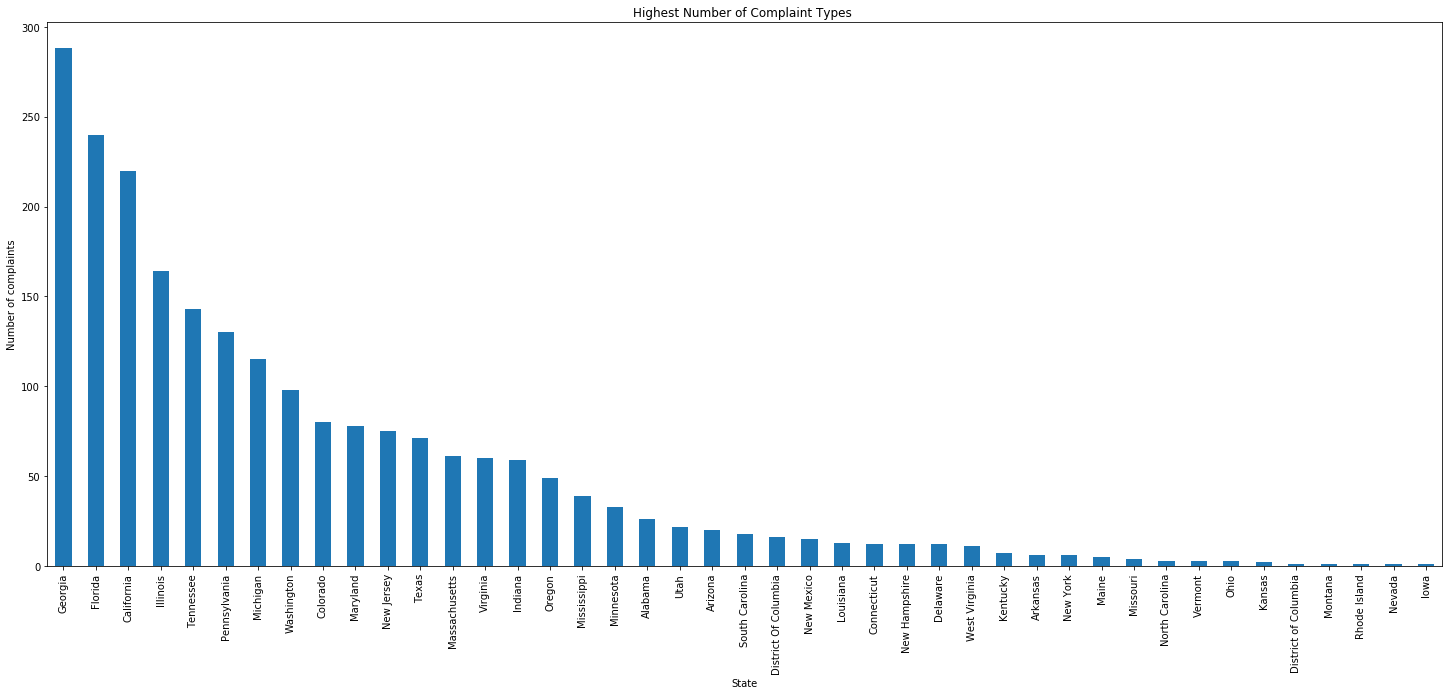

In [376]:
plt.figure(figsize=(25,10))
comcast_dataset['State'].value_counts().plot.bar()
plt.title('Highest Number of Complaint Types ')
plt.xlabel('State')
plt.ylabel('Number of complaints')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


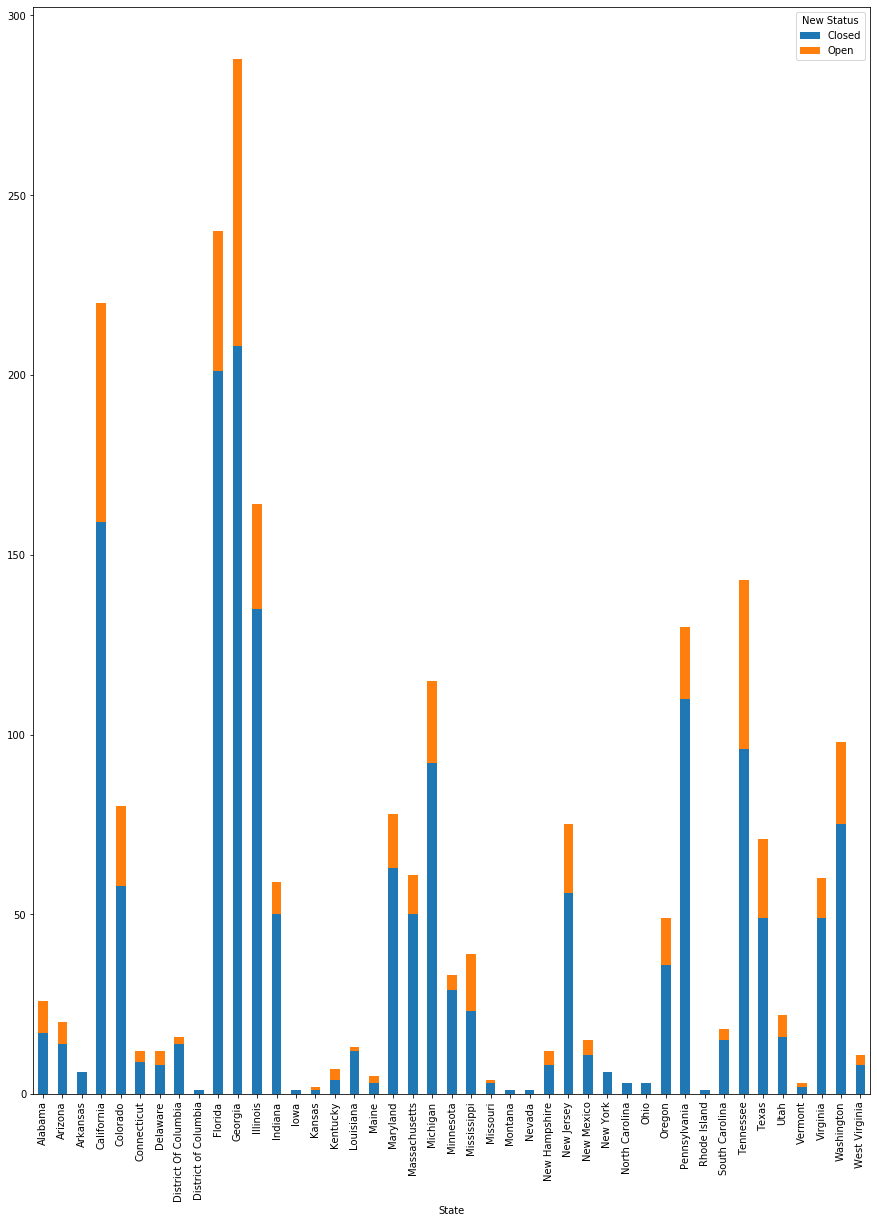

In [377]:
print(comcast_dataset.groupby(['State', 'New Status']).size().unstack().plot(kind='bar', figsize = (15,20), stacked=True))


### Georgia has the maximum complaints (288).

In [546]:
complaint_by_state = comcast_dataset.groupby(['State','New Status']).size().unstack().fillna(0)
complaint_by_state

New Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [392]:
complaint_by_state.iloc[0,1]

closed_cont = []
opened_cont = []

for i in range(0, len(complaint_by_state)):
     closed_cont.append(complaint_by_state.iloc[i,0])
        
for i in range(0, len(complaint_by_state)):
     opened_cont.append(complaint_by_state.iloc[i,1])

In [380]:
closed_complains = np.array(closed_cont)
opened_complains = np.array(opened_cont)

In [550]:
percentage_opened = (opened_complains/(opened_complains+closed_complains)) * 100
percentage_closed = (closed_complains/(opened_complains+closed_complains)) * 100
percentage_opened

array([34.61538462, 30.        ,  0.        , 27.72727273, 27.5       ,
       25.        , 33.33333333, 12.5       ,  0.        , 16.25      ,
       27.77777778, 17.68292683, 15.25423729,  0.        , 50.        ,
       42.85714286,  7.69230769, 40.        , 19.23076923, 18.03278689,
       20.        , 12.12121212, 41.02564103, 25.        ,  0.        ,
        0.        , 33.33333333, 25.33333333, 26.66666667,  0.        ,
        0.        ,  0.        , 26.53061224, 15.38461538,  0.        ,
       16.66666667, 32.86713287, 30.98591549, 27.27272727, 33.33333333,
       18.33333333, 23.46938776, 27.27272727])

In [557]:
dictionary = complaint_by_state.to_dict() # converting to dictionary

In [429]:
c = {} #closed
o = {} #opened

for k, v in dictionary.items(): # k represents keys and v represents values in dictionary
    if k == 'Closed':
        c.update(v)
    else:
        o.update(v)

In [505]:
# Finding a list with only states names
states = []
for keys in c:
    states.append(keys)

In [549]:
print("Length of states is {} and length of percentage open list is {}". format(len(states), len(percentage_opened)))

Length of states is 43 and length of percentage open list is 43


In [548]:
#fucntion to find the index of the maximum percentage value
def find_max_index(percentage_list):
    
    result = np.where(percentage_list == np.amax(percentage_list))
    return result[0]

In [538]:
#converting items in a list to a single integer
def convert(list_values):
    #convert to string first
    s = [str(i) for i in list_values]   
    # Join list items using join() 
    res = int("".join(s))   
    return res

In [555]:
opened_max_index = convert(find_max_index(percentage_opened))
#closed_max_index = find_max_index(percentage_closed) # This is not needed because these are already resolved cases. 
                                                     # Finding the max number will give 8 total states. 
                                                     # They have ONLY closed cases so the percentage is 100%.

In [540]:
print('Highest Unresolved Percentage is',percentage_opened.max(),'% from', states[opened_max_index])

Highest Unresolved Percentage is 50.0 % from Kansas


### Kansas has the highest percentage of unresolved complaints. This can be seen from the stacked bar graph as well as the calculation shown above. 

In [541]:
comcast_received = comcast_dataset.groupby(['Received Via', 'New Status']).size()
print(comcast_received)

Received Via        New Status
Customer Care Call  Closed        864
                    Open          255
Internet            Closed        843
                    Open          262
dtype: int64


In [542]:
closed = []
opened = []
for counter, value in enumerate(comcast_received):
    if counter % 2 == 0:
        closed.append(value)
    else:
        opened.append(value)       

In [543]:
closed = np.array(closed)
opened = np.array(opened)

In [544]:
percentage_open = (opened/(opened+closed)) * 100
percentage_close = (closed/(opened+closed)) * 100

In [545]:
print(percentage_open)

[22.78820375 23.71040724]


### Customer Care Call - 22.78% Open
### Internet - 23.71% Open

In [534]:
print(percentage_close)

[77.21179625 76.28959276]


### Customer Care Call - 22.78% close
### Internet - 23.71% close